<a href="https://colab.research.google.com/github/mind-shaker/fast_ai_1/blob/main/Classic_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Flatten, Dense

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [10]:
model = Sequential([
Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
Flatten(),
Dense(150, activation = 'relu'),
Dense(10, activation = 'softmax'),
])

In [3]:
input_layer = Input(shape=(32,32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
from keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])

In [5]:
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8503 - accuracy: 0.3318
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6727 - accuracy: 0.3999
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6055 - accuracy: 0.4254
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5634 - accuracy: 0.4413
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5301 - accuracy: 0.4509
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5120 - accuracy: 0.4587
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4850 - accuracy: 0.4673
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4669 - accuracy: 0.4744
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4517 - accuracy: 0.4814
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5203 - accuracy: 0.4664


[1.5203388929367065, 0.46639999747276306]

In [7]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 5ms/step


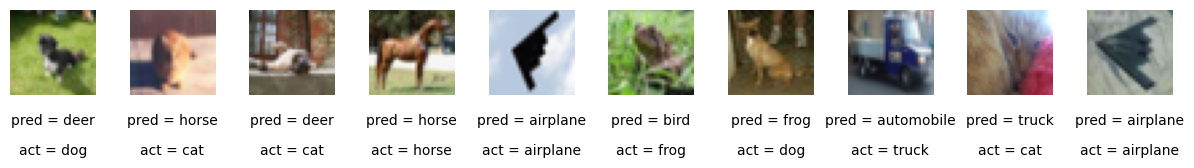

In [11]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)